In [1]:
# Libraries
# For implementing Bag of words
from sklearn.feature_extraction.text import CountVectorizer
# For implementing Linear Regression
from sklearn.linear_model import LinearRegression
# For implementing Support Vector Regression
from sklearn.svm import SVR
# For implementing Linear SVR
from sklearn.svm import LinearSVR

# For implementing CART
from sklearn.tree import DecisionTreeRegressor
# R2 Score
from sklearn.metrics import r2_score
# MAE Score
from sklearn.metrics import mean_absolute_error

# For Scaling of preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

import pandas as pd
import numpy as np
import seaborn as sns

Dataset: dblp-ref-3.json is considered in this experiment.
1. In this dataset, we considered papers whose venue rank and h5-index are known.
2. Venue rank and h5-index are taken from Aminer conference ranks website(http://aminer.org/ranks/conf)
3. We removed papers which has NaN in any feature.
4. Finally, the remaining dataset is split into train and test set at 80:30 ratio.

In [2]:
# Loading train and test dataset
train = pd.read_csv('Data/train_case_two.csv', index_col='Unnamed: 0')
test = pd.read_csv('Data/test_case_two.csv', index_col='Unnamed: 0')

In [3]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686 entries, 0 to 6685
Data columns (total 8 columns):
abstract      6686 non-null object
authors       6686 non-null object
id            6686 non-null object
n_citation    6686 non-null int64
references    6686 non-null object
title         6686 non-null object
venue         6686 non-null object
year          6686 non-null int64
dtypes: int64(2), object(6)
memory usage: 418.0+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 8 columns):
abstract      1672 non-null object
authors       1672 non-null object
id            1672 non-null object
n_citation    1672 non-null int64
references    1672 non-null object
title         1672 non-null object
venue         1672 non-null object
year          1672 non-null int64
dtypes: int64(2), object(6)
memory usage: 104.6+ KB


In [6]:
test.tail()

,abstract,authors,id,n_citation,references,title,venue,year
1667,Condition-based maintenance (CBM) has received...,"['Minou C.A. Olde Keizer', 'Simme Douwe P. Fla...",9db0808b-f67e-49b1-8ce6-d58dd4d96cb3,50,"['030d7248-9611-4a78-a7a1-5bebabf8a84b', '0559...",Condition-based maintenance policies for syste...,European Journal of Operational Research,2017
1668,This article presents an extension of the IaaS...,"['Hamza Ouarnoughi', 'Jalil Boukhobza', 'Frank...",5652eae4-ec59-448d-bca7-224d2a97ab42,0,"['444373bf-e707-462c-9da2-48c67e9d4187', '5a4c...",Integrating I/Os in Cloudsim for Performance a...,Operating Systems Review,2017
1669,"In analyzing longitudinal data, within-subject...","['Lianfen Qian', 'Suojin Wang']",66a00e3e-938b-4e17-9a04-c8f6526720d8,0,[],Subject-wise empirical likelihood inference in...,Computational Statistics & Data Analysis,2017
1670,Peer-to-peer network is organized on top of an...,"['Sara Fathipour Deiman', 'Ali Mohammad Saghir...",a2b1bca8-fa93-41c4-84d7-77f1cb4e3df3,0,"['092300d0-146d-46d6-ba94-7188584c4ccc', '1c26...",A Delay Aware Super-Peer Selection Algorithm f...,Wireless Personal Communications,2017
1671,A computational secret-sharing scheme is a met...,"['Ilan Komargodski', 'Moni Naor', 'Eylon Yogev']",c3020a17-2c9f-4e58-80ea-2b81a2086c65,0,"['05c4021c-2169-45a0-949b-d3fab1b88af1', '0b62...",Secret-Sharing for NP,Journal of Cryptology,2017


## Age feature is derived

In [7]:
train['age'] = 2018 - train.year
test['age'] = 2018 - test.year

In [8]:
train[train.age > 10].head()

,abstract,authors,id,n_citation,references,title,venue,year,age
65,Declustering techniques have been widely adopt...,"['Rakesh K. Sinha', 'Randeep Bhatia', 'Chung-M...",67a186a6-c025-4584-bcf3-7490a3c6c6cb,53,"['1d85fc08-5218-4254-bc56-413a70972bcd', '22c4...",Asymptotically optimal declustering schemes fo...,Theoretical Computer Science,2003,15
106,In this work we consider the Colpitts oscillat...,"['Oscar De Feo', 'Gian Mario Maggio', 'Michael...",fe89b02d-e097-49d5-b84f-0ecfe12a26f7,55,[],The Colpitts oscillator: Families of periodic ...,International Journal of Bifurcation and Chaos,2000,18
132,This paper introduces a new mechanism for spec...,"['Gregory E. Graham', 'M. Anzar Afaq', 'David ...",b9e0d58e-dec1-4e5d-9f26-c74f180ecc6f,0,"['699e4d26-730c-40b3-bec8-cc5ef6efabff', '6ff0...",Contextual Constraint Modeling in Grid Applica...,Concurrency and Computation: Practice and Expe...,2006,12
173,Grassmannian frames are frames satisfying a mi...,"['John J. Benedetto', 'Joseph D. Kolesar']",be01749c-9612-4763-86f6-9885faf73a2a,74,"['1efdec77-a53c-4e92-8877-941e9e5cf103', '7bda...",Geometric Properties of Grassmannian Frames fo...,EURASIP Journal on Advances in Signal Processing,2006,12
218,A reformulation of the path length of binary s...,['Helmut Prodinger'],5d790c9a-6828-4902-b357-a76e8f8f2e59,8,['185ae1b4-2e83-4376-bf15-ea78442c99f9'],A q -Analogue of the Path Length of Binary Sea...,Algorithmica,2001,17


In [9]:
test[test.age > 10].head()

,abstract,authors,id,n_citation,references,title,venue,year,age
7,Calendar applications for small handheld devic...,"['Benjamin B. Bederson', 'Aaron Clamage', 'Mar...",41547a1b-4659-4ae4-8530-29dee0dbaad5,242,"['1a6548e3-ac10-4a17-a70f-b5a95bf4866a', '2b49...",DateLens: A fisheye calendar interface for PDAs,ACM Transactions on Computer-Human Interaction,2004,14
87,"In this paper, we present a new upper bound fo...",['Van H. Vu'],c99eaf28-c23e-4be3-8ad3-7a7aea34cff2,84,"['1a13d600-c9ab-4a3b-a71f-e172976117a2', 'f19c...",Spectral norm of random matrices,Combinatorica,2007,11
181,This paper formulates a new approach to the st...,['Amlan K. Sengupta'],65f93b20-7fc6-4494-9e38-600741594cb1,10,['5ca9f573-14f9-4b7e-91e4-979d54447977'],TOWARD A THEORY OF CHAOS,International Journal of Bifurcation and Chaos,2003,15
617,Abstract The tree-metric theorem provides a ...,"['Lior Pachter', 'David E Speyer']",94165c07-5d81-418e-912a-8f3302c1c8a8,69,"['0270a584-f399-4db0-82a6-5cf6dfc2a310', '9219...",Reconstructing trees from subtree weights,Applied Mathematics Letters,2004,14
638,Since optical character recognition systems of...,['John D. Hobby'],0fd421fb-1cbc-4324-b26c-50acdd336342,67,"['2184be7d-6ffb-4f9f-bbc4-e34cee4061d0', '44ac...",Matching document images with ground truth,International Journal on Document Analysis and...,1998,20


In [10]:
test.tail()

,abstract,authors,id,n_citation,references,title,venue,year,age
1667,Condition-based maintenance (CBM) has received...,"['Minou C.A. Olde Keizer', 'Simme Douwe P. Fla...",9db0808b-f67e-49b1-8ce6-d58dd4d96cb3,50,"['030d7248-9611-4a78-a7a1-5bebabf8a84b', '0559...",Condition-based maintenance policies for syste...,European Journal of Operational Research,2017,1
1668,This article presents an extension of the IaaS...,"['Hamza Ouarnoughi', 'Jalil Boukhobza', 'Frank...",5652eae4-ec59-448d-bca7-224d2a97ab42,0,"['444373bf-e707-462c-9da2-48c67e9d4187', '5a4c...",Integrating I/Os in Cloudsim for Performance a...,Operating Systems Review,2017,1
1669,"In analyzing longitudinal data, within-subject...","['Lianfen Qian', 'Suojin Wang']",66a00e3e-938b-4e17-9a04-c8f6526720d8,0,[],Subject-wise empirical likelihood inference in...,Computational Statistics & Data Analysis,2017,1
1670,Peer-to-peer network is organized on top of an...,"['Sara Fathipour Deiman', 'Ali Mohammad Saghir...",a2b1bca8-fa93-41c4-84d7-77f1cb4e3df3,0,"['092300d0-146d-46d6-ba94-7188584c4ccc', '1c26...",A Delay Aware Super-Peer Selection Algorithm f...,Wireless Personal Communications,2017,1
1671,A computational secret-sharing scheme is a met...,"['Ilan Komargodski', 'Moni Naor', 'Eylon Yogev']",c3020a17-2c9f-4e58-80ea-2b81a2086c65,0,"['05c4021c-2169-45a0-949b-d3fab1b88af1', '0b62...",Secret-Sharing for NP,Journal of Cryptology,2017,1


## Aminer Rank

In [11]:
# Loading aminer conference ranks and h5-index
aminer = pd.read_csv('Data/Aminer_Conf_Ranks.csv')

aminer = aminer[['Rank', 'Conference', 'H5-Index']]
aminer.dropna(inplace=True)
# rename is performed in order to do the merging smoothly
aminer.rename(index=str, columns={"Conference": "venue"}, inplace=True)
aminer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 0 to 999
Data columns (total 3 columns):
Rank        978 non-null int64
venue       978 non-null object
H5-Index    978 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.6+ KB


In [12]:
# Merged train and test dataset with Aminer rank and h5-index.
train = pd.merge(train, aminer, how='left', on=['venue'])
test = pd.merge(test, aminer, how='left', on=['venue'])

In [13]:
# Dropped duplicate papers
train.drop_duplicates(['id'], keep='last', inplace=True)
test.drop_duplicates(['id'], keep='last', inplace=True)

In [14]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [15]:
test.tail()

,abstract,authors,id,n_citation,references,title,venue,year,age,Rank,H5-Index
1667,Condition-based maintenance (CBM) has received...,"['Minou C.A. Olde Keizer', 'Simme Douwe P. Fla...",9db0808b-f67e-49b1-8ce6-d58dd4d96cb3,50,"['030d7248-9611-4a78-a7a1-5bebabf8a84b', '0559...",Condition-based maintenance policies for syste...,European Journal of Operational Research,2017,1,26,59.0
1668,This article presents an extension of the IaaS...,"['Hamza Ouarnoughi', 'Jalil Boukhobza', 'Frank...",5652eae4-ec59-448d-bca7-224d2a97ab42,0,"['444373bf-e707-462c-9da2-48c67e9d4187', '5a4c...",Integrating I/Os in Cloudsim for Performance a...,Operating Systems Review,2017,1,463,21.0
1669,"In analyzing longitudinal data, within-subject...","['Lianfen Qian', 'Suojin Wang']",66a00e3e-938b-4e17-9a04-c8f6526720d8,0,[],Subject-wise empirical likelihood inference in...,Computational Statistics & Data Analysis,2017,1,186,32.0
1670,Peer-to-peer network is organized on top of an...,"['Sara Fathipour Deiman', 'Ali Mohammad Saghir...",a2b1bca8-fa93-41c4-84d7-77f1cb4e3df3,0,"['092300d0-146d-46d6-ba94-7188584c4ccc', '1c26...",A Delay Aware Super-Peer Selection Algorithm f...,Wireless Personal Communications,2017,1,542,19.0
1671,A computational secret-sharing scheme is a met...,"['Ilan Komargodski', 'Moni Naor', 'Eylon Yogev']",c3020a17-2c9f-4e58-80ea-2b81a2086c65,0,"['05c4021c-2169-45a0-949b-d3fab1b88af1', '0b62...",Secret-Sharing for NP,Journal of Cryptology,2017,1,391,23.0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686 entries, 0 to 6685
Data columns (total 11 columns):
abstract      6686 non-null object
authors       6686 non-null object
id            6686 non-null object
n_citation    6686 non-null int64
references    6686 non-null object
title         6686 non-null object
venue         6686 non-null object
year          6686 non-null int64
age           6686 non-null int64
Rank          6686 non-null int64
H5-Index      6686 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 574.7+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 11 columns):
abstract      1672 non-null object
authors       1672 non-null object
id            1672 non-null object
n_citation    1672 non-null int64
references    1672 non-null object
title         1672 non-null object
venue         1672 non-null object
year          1672 non-null int64
age           1672 non-null int64
Rank          1672 non-null int64
H5-Index      1672 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 143.8+ KB


## Derived rank-age feature
##### rank-age = rank * age

In [18]:
train['rank-age'] = train['Rank'] * train['age']
test['rank-age'] = test['Rank'] * test['age']

## Derived H5-Index-age
###### h5-age = H5-Index * age

In [19]:
train['h5-age'] = train['H5-Index'] * train['age']
test['h5-age'] = test['H5-Index'] * test['age']

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686 entries, 0 to 6685
Data columns (total 13 columns):
abstract      6686 non-null object
authors       6686 non-null object
id            6686 non-null object
n_citation    6686 non-null int64
references    6686 non-null object
title         6686 non-null object
venue         6686 non-null object
year          6686 non-null int64
age           6686 non-null int64
Rank          6686 non-null int64
H5-Index      6686 non-null float64
rank-age      6686 non-null int64
h5-age        6686 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 679.1+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 13 columns):
abstract      1672 non-null object
authors       1672 non-null object
id            1672 non-null object
n_citation    1672 non-null int64
references    1672 non-null object
title         1672 non-null object
venue         1672 non-null object
year          1672 non-null int64
age           1672 non-null int64
Rank          1672 non-null int64
H5-Index      1672 non-null float64
rank-age      1672 non-null int64
h5-age        1672 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 169.9+ KB


In [22]:
test.tail()

,abstract,authors,id,n_citation,references,title,venue,year,age,Rank,H5-Index,rank-age,h5-age
1667,Condition-based maintenance (CBM) has received...,"['Minou C.A. Olde Keizer', 'Simme Douwe P. Fla...",9db0808b-f67e-49b1-8ce6-d58dd4d96cb3,50,"['030d7248-9611-4a78-a7a1-5bebabf8a84b', '0559...",Condition-based maintenance policies for syste...,European Journal of Operational Research,2017,1,26,59.0,26,59.0
1668,This article presents an extension of the IaaS...,"['Hamza Ouarnoughi', 'Jalil Boukhobza', 'Frank...",5652eae4-ec59-448d-bca7-224d2a97ab42,0,"['444373bf-e707-462c-9da2-48c67e9d4187', '5a4c...",Integrating I/Os in Cloudsim for Performance a...,Operating Systems Review,2017,1,463,21.0,463,21.0
1669,"In analyzing longitudinal data, within-subject...","['Lianfen Qian', 'Suojin Wang']",66a00e3e-938b-4e17-9a04-c8f6526720d8,0,[],Subject-wise empirical likelihood inference in...,Computational Statistics & Data Analysis,2017,1,186,32.0,186,32.0
1670,Peer-to-peer network is organized on top of an...,"['Sara Fathipour Deiman', 'Ali Mohammad Saghir...",a2b1bca8-fa93-41c4-84d7-77f1cb4e3df3,0,"['092300d0-146d-46d6-ba94-7188584c4ccc', '1c26...",A Delay Aware Super-Peer Selection Algorithm f...,Wireless Personal Communications,2017,1,542,19.0,542,19.0
1671,A computational secret-sharing scheme is a met...,"['Ilan Komargodski', 'Moni Naor', 'Eylon Yogev']",c3020a17-2c9f-4e58-80ea-2b81a2086c65,0,"['05c4021c-2169-45a0-949b-d3fab1b88af1', '0b62...",Secret-Sharing for NP,Journal of Cryptology,2017,1,391,23.0,391,23.0


,n_citation,H5-Index
n_citation,1.000000,0.017628
H5-Index,0.017628,1.000000


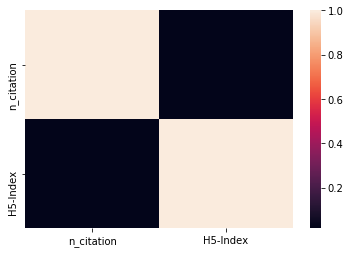

In [23]:
train_corr = train[['n_citation', 'H5-Index']].corr()
sns.heatmap(train_corr);
train_corr

## Average citation count for venues
###### This data is generated in data preprocessing.

In [24]:
venueCC = pd.read_csv('Data/AvgVenueCitationFromTrainData_case_two.csv', index_col='Unnamed: 0')

In [25]:
venueCC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 2 columns):
venue           312 non-null object
avgVenueCite    312 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.3+ KB


In [26]:
test.tail()

,abstract,authors,id,n_citation,references,title,venue,year,age,Rank,H5-Index,rank-age,h5-age
1667,Condition-based maintenance (CBM) has received...,"['Minou C.A. Olde Keizer', 'Simme Douwe P. Fla...",9db0808b-f67e-49b1-8ce6-d58dd4d96cb3,50,"['030d7248-9611-4a78-a7a1-5bebabf8a84b', '0559...",Condition-based maintenance policies for syste...,European Journal of Operational Research,2017,1,26,59.0,26,59.0
1668,This article presents an extension of the IaaS...,"['Hamza Ouarnoughi', 'Jalil Boukhobza', 'Frank...",5652eae4-ec59-448d-bca7-224d2a97ab42,0,"['444373bf-e707-462c-9da2-48c67e9d4187', '5a4c...",Integrating I/Os in Cloudsim for Performance a...,Operating Systems Review,2017,1,463,21.0,463,21.0
1669,"In analyzing longitudinal data, within-subject...","['Lianfen Qian', 'Suojin Wang']",66a00e3e-938b-4e17-9a04-c8f6526720d8,0,[],Subject-wise empirical likelihood inference in...,Computational Statistics & Data Analysis,2017,1,186,32.0,186,32.0
1670,Peer-to-peer network is organized on top of an...,"['Sara Fathipour Deiman', 'Ali Mohammad Saghir...",a2b1bca8-fa93-41c4-84d7-77f1cb4e3df3,0,"['092300d0-146d-46d6-ba94-7188584c4ccc', '1c26...",A Delay Aware Super-Peer Selection Algorithm f...,Wireless Personal Communications,2017,1,542,19.0,542,19.0
1671,A computational secret-sharing scheme is a met...,"['Ilan Komargodski', 'Moni Naor', 'Eylon Yogev']",c3020a17-2c9f-4e58-80ea-2b81a2086c65,0,"['05c4021c-2169-45a0-949b-d3fab1b88af1', '0b62...",Secret-Sharing for NP,Journal of Cryptology,2017,1,391,23.0,391,23.0


In [27]:
train = pd.merge(train, venueCC, on=['venue'], how='left')
test = pd.merge(test, venueCC, on=['venue'], how='left')

In [28]:
test.dropna(inplace=True)

In [29]:
train['venueCC-age'] = train['avgVenueCite'] * train['age']
test['venueCC-age'] = test['avgVenueCite'] * test['age']

In [30]:
len(test)

1662

In [31]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [32]:
test.tail()

,abstract,authors,id,n_citation,references,title,venue,year,age,Rank,H5-Index,rank-age,h5-age,avgVenueCite,venueCC-age
1657,The medial axis is a natural skeleton for shap...,"['Lei Lan', 'Junfeng Yao', 'Ping Huang', 'Xiao...",f10d2b94-a293-4c39-aba5-6f1e618bfb26,50,"['01844457-36fa-4c85-8b31-e06e31702d4f', '0c04...",Medial-axis-driven shape deformation with volu...,The Visual Computer,2017,1,574,19.0,574,19.0,28.333333,28.333333
1658,Condition-based maintenance (CBM) has received...,"['Minou C.A. Olde Keizer', 'Simme Douwe P. Fla...",9db0808b-f67e-49b1-8ce6-d58dd4d96cb3,50,"['030d7248-9611-4a78-a7a1-5bebabf8a84b', '0559...",Condition-based maintenance policies for syste...,European Journal of Operational Research,2017,1,26,59.0,26,59.0,6.220779,6.220779
1659,This article presents an extension of the IaaS...,"['Hamza Ouarnoughi', 'Jalil Boukhobza', 'Frank...",5652eae4-ec59-448d-bca7-224d2a97ab42,0,"['444373bf-e707-462c-9da2-48c67e9d4187', '5a4c...",Integrating I/Os in Cloudsim for Performance a...,Operating Systems Review,2017,1,463,21.0,463,21.0,18.181818,18.181818
1660,"In analyzing longitudinal data, within-subject...","['Lianfen Qian', 'Suojin Wang']",66a00e3e-938b-4e17-9a04-c8f6526720d8,0,[],Subject-wise empirical likelihood inference in...,Computational Statistics & Data Analysis,2017,1,186,32.0,186,32.0,1.470588,1.470588
1661,Peer-to-peer network is organized on top of an...,"['Sara Fathipour Deiman', 'Ali Mohammad Saghir...",a2b1bca8-fa93-41c4-84d7-77f1cb4e3df3,0,"['092300d0-146d-46d6-ba94-7188584c4ccc', '1c26...",A Delay Aware Super-Peer Selection Algorithm f...,Wireless Personal Communications,2017,1,542,19.0,542,19.0,1.912568,1.912568


In [33]:
test.dropna(inplace=True)

In [34]:
test.tail()

,abstract,authors,id,n_citation,references,title,venue,year,age,Rank,H5-Index,rank-age,h5-age,avgVenueCite,venueCC-age
1657,The medial axis is a natural skeleton for shap...,"['Lei Lan', 'Junfeng Yao', 'Ping Huang', 'Xiao...",f10d2b94-a293-4c39-aba5-6f1e618bfb26,50,"['01844457-36fa-4c85-8b31-e06e31702d4f', '0c04...",Medial-axis-driven shape deformation with volu...,The Visual Computer,2017,1,574,19.0,574,19.0,28.333333,28.333333
1658,Condition-based maintenance (CBM) has received...,"['Minou C.A. Olde Keizer', 'Simme Douwe P. Fla...",9db0808b-f67e-49b1-8ce6-d58dd4d96cb3,50,"['030d7248-9611-4a78-a7a1-5bebabf8a84b', '0559...",Condition-based maintenance policies for syste...,European Journal of Operational Research,2017,1,26,59.0,26,59.0,6.220779,6.220779
1659,This article presents an extension of the IaaS...,"['Hamza Ouarnoughi', 'Jalil Boukhobza', 'Frank...",5652eae4-ec59-448d-bca7-224d2a97ab42,0,"['444373bf-e707-462c-9da2-48c67e9d4187', '5a4c...",Integrating I/Os in Cloudsim for Performance a...,Operating Systems Review,2017,1,463,21.0,463,21.0,18.181818,18.181818
1660,"In analyzing longitudinal data, within-subject...","['Lianfen Qian', 'Suojin Wang']",66a00e3e-938b-4e17-9a04-c8f6526720d8,0,[],Subject-wise empirical likelihood inference in...,Computational Statistics & Data Analysis,2017,1,186,32.0,186,32.0,1.470588,1.470588
1661,Peer-to-peer network is organized on top of an...,"['Sara Fathipour Deiman', 'Ali Mohammad Saghir...",a2b1bca8-fa93-41c4-84d7-77f1cb4e3df3,0,"['092300d0-146d-46d6-ba94-7188584c4ccc', '1c26...",A Delay Aware Super-Peer Selection Algorithm f...,Wireless Personal Communications,2017,1,542,19.0,542,19.0,1.912568,1.912568


,n_citation,age
n_citation,1.000000,0.369863
age,0.369863,1.000000


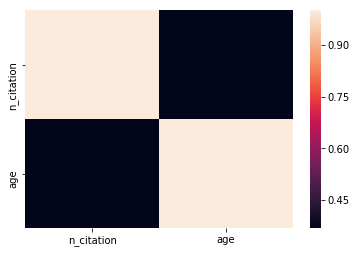

In [35]:
train_corr = train[['n_citation', 'age']].corr()
sns.heatmap(train_corr);
train_corr

## Author AcCc -- Train

In [36]:
# # Training Set Data

# Indexing is done to remove any discrepancies between removal of records during drop of rows
# data_train.index = pd.RangeIndex(len(data_train_Complete.index))

data_id_train = train['id']
data_Author_train = train['authors']
data_numberOfCitation_train = train['n_citation']
####################################################################################

data_Author_train = data_Author_train
data_numberOfCitation_train = data_numberOfCitation_train

In [37]:
# Length of Train Data
print(len(data_numberOfCitation_train))

6686


In [38]:
# Train################################################################
# Here we are combining first and last name of authors to identify them
# Our assumption is all authors have unique name and they are different based on their name 

# Find all authors from all the papers and store in a list
X_train_authorValue=list()
for key, value in data_Author_train.items():
    X_train_authorValue.append(value)
    
##########################################################################################

# Here we make name in X_train_authorValue as lowercase and combine the first and last name 
# And remove any spaces,special character - between names 

X_train_authorValue=','.join(str(e).lower().replace(" ","") for e in data_Author_train[0:len(data_Author_train)])
X_train_authorValue=X_train_authorValue.replace('-','')
X_train_authorValue=X_train_authorValue.replace('.','')

# Copy contents to new string and replace blank and special character like '[', ']' inside the name
X_train_allAuthorsNew=X_train_authorValue.replace('[','')
X_train_allAuthorsNew=X_train_allAuthorsNew.replace(']','')
X_train_allAuthorsNew=X_train_allAuthorsNew.replace(" ","")

# We create an array X_train_authorValueArray of authors for papers by using ],[ as splitting criterion 
X_train_authorValueArray=X_train_authorValue.split('],[')
X_train_authorValueArray = [s.replace('[', '') for s in X_train_authorValueArray]
X_train_authorValueArray = [s.replace(']', '') for s in X_train_authorValueArray]

In [39]:
# Train################################################################
# Bag of Words Implementation
train_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 500000) 
train_sentences=[X_train_allAuthorsNew]
train_data_features = train_vectorizer.fit_transform(train_sentences)
train_vectorizerActual=train_vectorizer.transform([value for value in X_train_authorValueArray[0:len(X_train_authorValueArray)]])
# train_vectorList = train_vectorizer.transform([value for value in X_train_authorValueArray[0:len(X_train_authorValueArray)]]).toarray()
train_vectorList = pd.SparseDataFrame(train_vectorizerActual).fillna(0)
############################################################################
train_authorList=pd.DataFrame(train_vectorizer.get_feature_names()).rename(index=int, columns={0: "authorList"})

In [40]:
# Get Number of authors Feature Names after implementation of bag of words
print(len(train_vectorizer.get_feature_names()))

21377


In [41]:
# Finding Total Number of Papers written by different author
train_authorInfo=pd.DataFrame(train_vectorList)
train_TotalNumberOfPapers = pd.DataFrame(train_authorInfo.sum(axis=0)).rename(index=int, columns={0: "TotalNumberOfPapers"})
train_TotalNumberOfPapers['authorList']=train_authorList

# Filtering the authors who has written only one paper
train_TotalNumberOfPapers_1=train_TotalNumberOfPapers[train_TotalNumberOfPapers['TotalNumberOfPapers']==1]

In [42]:
train_TotalNumberOfPapers.isnull().values.any()

False

In [43]:
# Append the sparse matrix to a dataframe and number of citation for each paper
train_dataAuthorAndCitation=pd.DataFrame(train_vectorList)
train_dataAuthorCitationAndVenueWeights=train_dataAuthorAndCitation.copy()
train_dataAuthorCitationAndVenueWeights['n_citation']=data_numberOfCitation_train

In [44]:
train_dataAuthorCitationAndVenueWeights.head(2)

,0,1,2,3,4,5,6,7,8,9,...,21368,21369,21370,21371,21372,21373,21374,21375,21376,n_citation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [45]:
# Calculating total number of citation author has during the period 
# and assigning it to frame train_sumOfCitationForAuthors 

train_sumOfCitationForAuthors=pd.DataFrame(train_authorInfo.multiply(pd.DataFrame(data_numberOfCitation_train)["n_citation"], axis = 0).sum(axis=0)).rename(index=int, columns={0: "SumOfCitationCount"})

# Calculating average citation for authors by dividing total number of citations by total number of papers
# written by the authors  
train_averageCitationForAuthors = pd.DataFrame(train_sumOfCitationForAuthors.div(train_TotalNumberOfPapers['TotalNumberOfPapers'],axis=0)).rename(index=int, columns={0: "AverageCitationCount"})

# Assigning train_sumOfCitationForAuthors and AverageCitationCount 
# to the frame train_author_InformationFinal for each authors
train_author_InformationFinal=pd.DataFrame(train_TotalNumberOfPapers)
train_author_InformationFinal['SumOfCitationCount'] = train_sumOfCitationForAuthors
train_author_InformationFinal['AverageCitationCount'] = train_averageCitationForAuthors

In [46]:
# First 1st 3 rows of train_author_InformationFinal
train_author_InformationFinal.head(3)

,TotalNumberOfPapers,authorList,SumOfCitationCount,AverageCitationCount
0,1.0,aabdelfattah,0.0,0.0
1,1.0,aaishaamjad,0.0,0.0
2,1.0,aameeliaroseline,0.0,0.0


In [47]:
# Last 10 rows of train_author_InformationFinal
train_author_InformationFinal.tail(10)

,TotalNumberOfPapers,authorList,SumOfCitationCount,AverageCitationCount
21367,1.0,łukaszwróbel,0.0,0.0
21368,1.0,łukaszłaniewskiwołłk,0.0,0.0
21369,1.0,şahinkoçak,0.0,0.0
21370,1.0,şeydayılmaz,0.0,0.0
21371,1.0,špelažuperl,0.0,0.0
21372,1.0,štefkomiklavič,0.0,0.0
21373,1.0,štĕpánkastehlíková,0.0,0.0
21374,1.0,štěpánjurajda,0.0,0.0
21375,1.0,żanetakaszta,50.0,50.0
21376,1.0,мkaidan,0.0,0.0


In [48]:
# Creating the duplicate frame train_author_InformationDup from train_author_InformationFinal
# Dropping SumOfCitationCount and TotalNumberOfPapers column from the frame
train_author_InformationDup=pd.DataFrame(train_author_InformationFinal)
train_author_InformationDup.drop(['SumOfCitationCount'], axis=1,inplace=True)
train_author_InformationDup.drop(['TotalNumberOfPapers'], axis=1,inplace=True)

In [49]:
# First 4 rows for train_author_InformationDup
train_author_InformationDup.head(4)

,authorList,AverageCitationCount
0,aabdelfattah,0.0
1,aaishaamjad,0.0
2,aameeliaroseline,0.0
3,aamerbilalasghar,0.0


In [50]:
# First 10 rows for train_author_InformationDup
train_author_InformationDup.head(10)

,authorList,AverageCitationCount
0,aabdelfattah,0.0
1,aaishaamjad,0.0
2,aameeliaroseline,0.0
3,aamerbilalasghar,0.0
4,aanpalagan,0.0
5,aari,0.0
6,aarneodo,0.0
7,aarongibson,0.0
8,aaronherman,0.0
9,aaronjmasino,0.0


In [51]:
# Last 3 rows of train_author_InformationDup
train_author_InformationDup.tail(3)

,authorList,AverageCitationCount
21374,štěpánjurajda,0.0
21375,żanetakaszta,50.0
21376,мkaidan,0.0


In [52]:
# Description of train_author_InformationDup 
train_author_InformationDup.describe()

,AverageCitationCount
count,21377.000000
mean,8.828901
std,52.365848
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2844.000000


In [53]:
# train_author_InformationDup statistics
train_author_InformationDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21377 entries, 0 to 21376
Data columns (total 2 columns):
authorList              21377 non-null object
AverageCitationCount    21377 non-null float64
dtypes: float64(1), object(1)
memory usage: 501.0+ KB


In [54]:
# Copy of train_author_InformationDup
train_data_authorPapers=train_author_InformationDup.copy()

In [55]:
# First 4 rows of train_data_authorPapers
train_data_authorPapers.head(4)

,authorList,AverageCitationCount
0,aabdelfattah,0.0
1,aaishaamjad,0.0
2,aameeliaroseline,0.0
3,aamerbilalasghar,0.0


In [56]:
# Copy frame to another train_authorInfo
train_authorInfoNew=train_authorInfo.copy()

# Transposing the AverageCitationCount feature from column to a single row
# so that the cumulating Ranking weight ['CumulativeAuthorCitationCount'] can be found out
# And adding column TotalNumberOfAuthors for the paper to the same frame

train_authorAverageCitationCount=pd.DataFrame((train_data_authorPapers)["AverageCitationCount"]).T
train_authorInfoNew['CumulativeAuthorCitationCount']=pd.DataFrame(train_authorInfo.iloc[:,range(0,len(train_authorInfo.columns))].values*train_authorAverageCitationCount.iloc[:,range(0,len(train_authorAverageCitationCount.columns))].values).sum(axis=1)
train_authorInfoNew['TotalNumberOfAuthors']=pd.DataFrame(train_authorInfo.sum(axis=1))

In [57]:
# First 3 rows of train_authorInfoNew
train_authorInfoNew.head(3)

,0,1,2,3,4,5,6,7,8,9,...,21369,21370,21371,21372,21373,21374,21375,21376,CumulativeAuthorCitationCount,TotalNumberOfAuthors
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [58]:
# Dropping the numbered indexes related to Authors and 
# adding a new column/Feature called AverageCumulativeAuthorCitationCount (AcCc) 
# found by dividing CumulativeAuthorCitationCount by TotalNumberOfAuthors for each paper

train_authorInfoNewCopy=train_authorInfoNew.copy()
train_authorInfoNewCopy.drop(range(0,len(train_authorInfoNewCopy.columns)-2),axis=1,inplace=True)
train_authorInfoNewCopy['AverageCumulativeAuthorCitationCount']=pd.DataFrame(train_authorInfoNewCopy['CumulativeAuthorCitationCount'].div(train_authorInfoNewCopy["TotalNumberOfAuthors"], axis = 0)).rename(index=int, columns={0: "AverageCumulativeAuthorCitationCount"})['AverageCumulativeAuthorCitationCount']

In [59]:
# First 3 rows of train_authorInfoNewCopy
train_authorInfoNewCopy.head(3)

,CumulativeAuthorCitationCount,TotalNumberOfAuthors,AverageCumulativeAuthorCitationCount
0,0.0,3.0,0.0
1,0.0,3.0,0.0
2,0.0,2.0,0.0


In [60]:
# Assigning columns id and n_citation to train_authorInfoNewCopy
train_authorInfoNewCopy['n_citation']=data_numberOfCitation_train
train_authorInfoNewCopy['id']=data_id_train

In [61]:
# First 3 rows of train_authorInfoNewCopy
train_authorInfoNewCopy.head(3)

,CumulativeAuthorCitationCount,TotalNumberOfAuthors,AverageCumulativeAuthorCitationCount,n_citation,id
0,0.0,3.0,0.0,0,4c5066c3-7ab5-4577-be22-10a5043b0bdb
1,0.0,3.0,0.0,0,77eee6bd-cfc3-438c-aa96-9cf7e987feb7
2,0.0,2.0,0.0,0,90ada658-4d06-489c-a9a2-7068bf0ac1ae


### Correlation - AverageCumulativeAuthorCitationCount(AcCc) vs n_citation  

,CumulativeAuthorCitationCount,TotalNumberOfAuthors,AverageCumulativeAuthorCitationCount,n_citation
CumulativeAuthorCitationCount,1.000000,0.090488,0.901771,0.899603
TotalNumberOfAuthors,0.090488,1.000000,-0.014213,-0.013784
AverageCumulativeAuthorCitationCount,0.901771,-0.014213,1.000000,0.995962
n_citation,0.899603,-0.013784,0.995962,1.000000


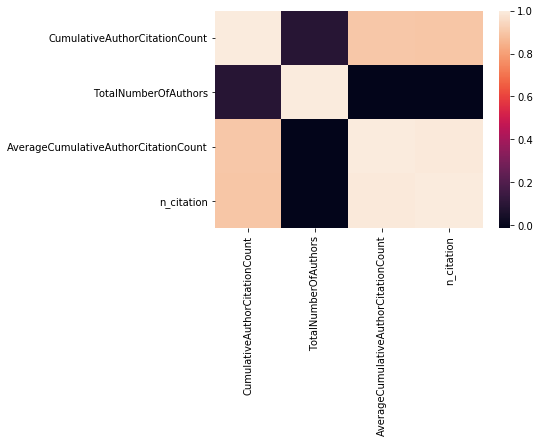

In [62]:
# Correlation Heat Map 
# Correlation between AverageCumulativeAuthorCitationCount(AcCc) and n_citation found to be 0.954561
corr = train_authorInfoNewCopy.corr()
sns.heatmap(corr);
corr

## Author - AcCc -- Test

In [63]:
# Test Set Data
# data_test.index = pd.RangeIndex(len(data_test_Complete.index))
data_Author_test = test['authors']
data_numberOfCitation_test = test['n_citation']
data_id_test = pd.DataFrame(test['id'])

In [64]:
data_id_test.index[data_id_test.index.duplicated(keep=False)]

Int64Index([], dtype='int64')

In [65]:
data_id_test.tail()

,id
1657,f10d2b94-a293-4c39-aba5-6f1e618bfb26
1658,9db0808b-f67e-49b1-8ce6-d58dd4d96cb3
1659,5652eae4-ec59-448d-bca7-224d2a97ab42
1660,66a00e3e-938b-4e17-9a04-c8f6526720d8
1661,a2b1bca8-fa93-41c4-84d7-77f1cb4e3df3


In [66]:
# Test################################################################
# Here we are combining first and last name of authors to identify them
# Our assumption is all authors have unique name and they are different which may not hold true for all cases 

# Find all authors from all the papers and store in a list
X_test_authorValue=list()
for key, value in data_Author_test.items():
    X_test_authorValue.append(value)
    
##########################################################################################

# Here we make name in X_test_authorValue as lowercase and combine the first and last name 
# And remove any spaces,special character - between names 

X_test_authorValue=','.join(str(e).lower().replace(" ","") for e in data_Author_test[0:len(data_Author_test)])
X_test_authorValue=X_test_authorValue.replace('-','')
X_test_authorValue=X_test_authorValue.replace('.','')


# Copy contents to new string and replace blank and special character like '[', ']' inside the name
X_test_allAuthorsNew=X_test_authorValue.replace('[','')
X_test_allAuthorsNew=X_test_allAuthorsNew.replace(']','')
X_test_allAuthorsNew=X_test_allAuthorsNew.replace(" ","")

# We create an array X_test_authorValueArray of authors for papers by using ],[ as splitting criterion 
# And replace '[', ']' and "'" inside the name
X_test_authorValueArray=X_test_authorValue.split('],[')
X_test_authorValueArray = [s.replace('[', '') for s in X_test_authorValueArray]
X_test_authorValueArray = [s.replace(']', '') for s in X_test_authorValueArray]

In [67]:
# Test################################################################
# Bag of Words Implementation
test_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 500000) 
test_sentences=[X_test_allAuthorsNew]
test_data_features = test_vectorizer.fit_transform(train_sentences)
test_vectorizerActual=test_vectorizer.transform([value for value in X_test_authorValueArray[0:len(X_test_authorValueArray)]])
test_vectorList = pd.SparseDataFrame(test_vectorizerActual).fillna(0)
############################################################################
test_authorList=pd.DataFrame(test_vectorizer.get_feature_names()).rename(index=int, columns={0: "authorList"})

In [68]:
# Get Number of authors Feature Names after implementation of bag of words
print(len(test_vectorizer.get_feature_names()))
# Get number of papers
print(len(test_vectorList))

21377
1662


In [69]:
# Get all the authors from the test set
test_authorInfo=pd.DataFrame(test_vectorList)
test_TotalNumberOfAuthors=test_authorList.copy()

In [70]:
# Assign AverageCitationCount for the authors in test data set based on trained dataset
# For new author, the default value of zero is assigned
test_data_authorPapers= pd.merge(test_TotalNumberOfAuthors, train_author_InformationDup, on='authorList',how='left')

In [71]:
# Copy frame to another train_authorInfo
test_authorInfoNew=test_authorInfo.copy()

In [72]:
test_authorInfoNew.tail()

,0,1,2,3,4,5,6,7,8,9,...,21367,21368,21369,21370,21371,21372,21373,21374,21375,21376
1657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
test_authorAverageCitationCount=pd.DataFrame((test_data_authorPapers)["AverageCitationCount"]).T
test_authorInfoNew['CumulativeAuthorCitationCount']=pd.DataFrame(test_authorInfo.iloc[:,range(0,len(test_authorInfo.columns))].values*test_authorAverageCitationCount.iloc[:,range(0,len(test_authorAverageCitationCount.columns))].values).sum(axis=1)
test_authorInfoNew['TotalNumberOfAuthors']=pd.DataFrame(test_authorInfo.sum(axis=1))
test_authorInfoNew['AverageCumulativeAuthorCitationCount']=pd.DataFrame(test_authorInfoNew['CumulativeAuthorCitationCount'].div(test_authorInfoNew["TotalNumberOfAuthors"], axis = 0)).rename(index=int, columns={0: "AverageCumulativeAuthorCitationCount"})['AverageCumulativeAuthorCitationCount']

In [74]:
test_authorInfoNew.tail()

,0,1,2,3,4,5,6,7,8,9,...,21370,21371,21372,21373,21374,21375,21376,CumulativeAuthorCitationCount,TotalNumberOfAuthors,AverageCumulativeAuthorCitationCount
1657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [75]:
test_authorInfoNew.index[test_authorInfoNew.index.duplicated(keep=False)]

Int64Index([], dtype='int64')

In [76]:
# test_authorInfoNew['id'] = data_id_test
# test_authorInfoNew['n_citation']=data_numberOfCitation_test
test_authorInfoNew.fillna(0,inplace=True)

In [77]:
len(test_authorInfoNew['AverageCumulativeAuthorCitationCount'])

1662

In [78]:
test.index.difference(test_authorInfoNew)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661],
           dtype='int64', length=1662)

In [79]:
test_authorInfoNew['AverageCumulativeAuthorCitationCount'].tail()

1657    0.0
1658    0.0
1659    0.0
1660    0.0
1661    0.0
Name: AverageCumulativeAuthorCitationCount, dtype: float64

In [80]:
test['AcCc'] = test_authorInfoNew['AverageCumulativeAuthorCitationCount']

In [81]:
len(test)

1662

In [82]:
test.tail()

,abstract,authors,id,n_citation,references,title,venue,year,age,Rank,H5-Index,rank-age,h5-age,avgVenueCite,venueCC-age,AcCc
1657,The medial axis is a natural skeleton for shap...,"['Lei Lan', 'Junfeng Yao', 'Ping Huang', 'Xiao...",f10d2b94-a293-4c39-aba5-6f1e618bfb26,50,"['01844457-36fa-4c85-8b31-e06e31702d4f', '0c04...",Medial-axis-driven shape deformation with volu...,The Visual Computer,2017,1,574,19.0,574,19.0,28.333333,28.333333,0.0
1658,Condition-based maintenance (CBM) has received...,"['Minou C.A. Olde Keizer', 'Simme Douwe P. Fla...",9db0808b-f67e-49b1-8ce6-d58dd4d96cb3,50,"['030d7248-9611-4a78-a7a1-5bebabf8a84b', '0559...",Condition-based maintenance policies for syste...,European Journal of Operational Research,2017,1,26,59.0,26,59.0,6.220779,6.220779,0.0
1659,This article presents an extension of the IaaS...,"['Hamza Ouarnoughi', 'Jalil Boukhobza', 'Frank...",5652eae4-ec59-448d-bca7-224d2a97ab42,0,"['444373bf-e707-462c-9da2-48c67e9d4187', '5a4c...",Integrating I/Os in Cloudsim for Performance a...,Operating Systems Review,2017,1,463,21.0,463,21.0,18.181818,18.181818,0.0
1660,"In analyzing longitudinal data, within-subject...","['Lianfen Qian', 'Suojin Wang']",66a00e3e-938b-4e17-9a04-c8f6526720d8,0,[],Subject-wise empirical likelihood inference in...,Computational Statistics & Data Analysis,2017,1,186,32.0,186,32.0,1.470588,1.470588,0.0
1661,Peer-to-peer network is organized on top of an...,"['Sara Fathipour Deiman', 'Ali Mohammad Saghir...",a2b1bca8-fa93-41c4-84d7-77f1cb4e3df3,0,"['092300d0-146d-46d6-ba94-7188584c4ccc', '1c26...",A Delay Aware Super-Peer Selection Algorithm f...,Wireless Personal Communications,2017,1,542,19.0,542,19.0,1.912568,1.912568,0.0


In [83]:
test_authorInfoNew.index[test_authorInfoNew.index.duplicated(keep=False)]

Int64Index([], dtype='int64')

### Join AcCc 

In [84]:
train['AcCc'] = train_authorInfoNewCopy['AverageCumulativeAuthorCitationCount']

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686 entries, 0 to 6685
Data columns (total 16 columns):
abstract        6686 non-null object
authors         6686 non-null object
id              6686 non-null object
n_citation      6686 non-null int64
references      6686 non-null object
title           6686 non-null object
venue           6686 non-null object
year            6686 non-null int64
age             6686 non-null int64
Rank            6686 non-null int64
H5-Index        6686 non-null float64
rank-age        6686 non-null int64
h5-age          6686 non-null float64
avgVenueCite    6686 non-null float64
venueCC-age     6686 non-null float64
AcCc            6686 non-null float64
dtypes: float64(5), int64(5), object(6)
memory usage: 835.8+ KB


## AcCc-age

In [86]:
train['AcCc-age'] = train['AcCc'] * train['age']
test['AcCc-age'] = test['AcCc'] * test['age']

,n_citation,AcCc-age
n_citation,1.000000,0.878892
AcCc-age,0.878892,1.000000


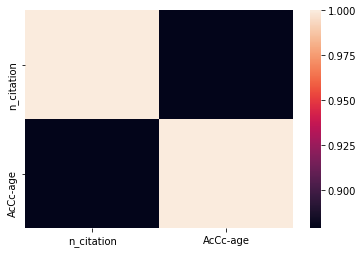

In [87]:
train_corr = train[['n_citation', 'AcCc-age']].corr()
sns.heatmap(train_corr);
train_corr

## Applying ML 

In [88]:
# X_train = train[['age', 'rank-age', 'h5-age', 'avgVenueCite', 'venueCC-age', 'AcCc', 'AcCc-age']]
# Y_train= train['n_citation']
# X_test = test[['age', 'rank-age', 'h5-age', 'avgVenueCite', 'venueCC-age', 'AcCc', 'AcCc-age']]
# Y_test = test['n_citation']

In [89]:
X_train = train[['age', 'rank-age', 'h5-age', 'avgVenueCite', 'venueCC-age']]
Y_train= train['n_citation']
X_test = test[['age', 'rank-age', 'h5-age', 'avgVenueCite', 'venueCC-age']]
Y_test = test['n_citation']

In [90]:
len(X_test)

1662

In [91]:
X_train_Dup=X_train.copy()
X_test_Dup=X_test.copy()

## Section Excluding AcCc

### Including All Featutes

## Linear Regression

In [92]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.14899944848188196
Mean Absolute Error 11.242240983728705


## CART Decision Tree Algorithm


In [93]:
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score 0.15314867387708775
Mean Absolute Error 10.291802233428635


## SVR with Linear kernel / Linear SVR Algorithm

In [94]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.1464224830495372
Mean Absolute Error with RBF kernel 7.890655859502256
R2 Score with Linear kernel -1.2115468074619122
Mean Absolute Error with Linear kernel 7.8221745621342595


#### Considering all features except Age

In [95]:
X_train = X_train_Dup.drop(['age'],axis=1)
X_test = X_test_Dup.drop(['age'],axis=1)

In [96]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
R2 Score 0.08739284789922241
Mean Absolute Error 11.31453076267318


In [97]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score 0.13159380757229022
Mean Absolute Error 10.302958470893534


In [98]:
# Visualisation of the CART tree formed
# feature_cols = ['age','Rank','H5-Index','ref_avg_count','AverageCumulativeAuthorCitationCount']
# dot_data = StringIO()
# export_graphviz(cart, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('../Data/CART.png')

In [99]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.14450075143629093
Mean Absolute Error with RBF kernel 7.86494024086831
R2 Score with Linear kernel -2.706668839696917
Mean Absolute Error with Linear kernel 8.587164046107302


#### Considering all features except avgVenueCite

In [100]:
X_train = X_train_Dup.drop(['avgVenueCite'],axis=1)
X_test = X_test_Dup.drop(['avgVenueCite'],axis=1)

In [101]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.11918672735233504
Mean Absolute Error 11.591612877856367


In [102]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score 0.09155002198115092
Mean Absolute Error 10.485870624924823


In [103]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.16006487225422628
Mean Absolute Error with RBF kernel 7.343248642639776
R2 Score with Linear kernel -0.3842601662682348
Mean Absolute Error with Linear kernel 7.872816852297575


#### Considering all features except h5-age

In [104]:
X_train = X_train_Dup.drop(['h5-age'],axis=1)
X_test = X_test_Dup.drop(['h5-age'],axis=1)

In [105]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.1653216257379212
Mean Absolute Error 11.244906844539878


In [106]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score 0.11501235356422657
Mean Absolute Error 10.32669994702671


In [107]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.13717901955561063
Mean Absolute Error with RBF kernel 7.719168855151662
R2 Score with Linear kernel -1.2119715207920532
Mean Absolute Error with Linear kernel 7.822302575219037


#### Considering all features except rank-age

In [108]:
X_train = X_train_Dup.drop(['rank-age'],axis=1)
X_test = X_test_Dup.drop(['rank-age'],axis=1)

In [109]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.05901905353847947
Mean Absolute Error 11.210854030768775


In [110]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score 0.25586741190321094
Mean Absolute Error 10.119068579196783


In [111]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.13681407243343569
Mean Absolute Error with RBF kernel 7.641197445587702
R2 Score with Linear kernel -1.2122502075785047
Mean Absolute Error with Linear kernel 7.822438203541904


#### Considering all features except venueCC-age

In [112]:
X_train = X_train_Dup.drop(['venueCC-age'],axis=1)
X_test = X_test_Dup.drop(['venueCC-age'],axis=1)

In [113]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.07644389343840197
Mean Absolute Error 11.326502104596853


In [114]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score 0.13189588733594348
Mean Absolute Error 10.244168859982986


In [115]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.14454624694305462
Mean Absolute Error with RBF kernel 7.952890501908552
R2 Score with Linear kernel 0.2768940395753441
Mean Absolute Error with Linear kernel 7.045305372698127


#### Considering only age

In [116]:
X_train=X_train_Dup[['age']]
X_test=X_test_Dup[['age']]

In [117]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.328589802599915
Mean Absolute Error 11.312506857371181


In [118]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.01414352707353328
Mean Absolute Error 11.562263990879758


In [119]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.15421854492342268
Mean Absolute Error with RBF kernel 7.144046352997262
R2 Score with Linear kernel 0.2769588591720963
Mean Absolute Error with Linear kernel 7.045408045645521


#### Considering only avgVenueCite

In [120]:
X_train=X_train_Dup[['avgVenueCite']]
X_test=X_test_Dup[['avgVenueCite']]

In [121]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.2049646310730815
Mean Absolute Error 12.356512574317666


In [122]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.20496463107308194
Mean Absolute Error 12.356512574317666


In [123]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.03821820296880807
Mean Absolute Error with RBF kernel 8.194096494150577
R2 Score with Linear kernel -0.09879841483495966
Mean Absolute Error with Linear kernel 7.614921780986787


#### Considering only h5-age 

In [124]:
X_train=X_train_Dup[['h5-age']]
X_test=X_test_Dup[['h5-age']]

In [125]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.3575379116020757
Mean Absolute Error 11.430184037310166


In [126]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -7.779097826821181
Mean Absolute Error 12.347628284016205


In [127]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.13921963089723444
Mean Absolute Error with RBF kernel 7.104560249362247
R2 Score with Linear kernel -0.05303393827769054
Mean Absolute Error with Linear kernel 7.680724949742148


#### Considering only rank-age 

In [128]:
X_train=X_train_Dup[['rank-age']]
X_test=X_test_Dup[['rank-age']]

In [129]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.08370664481628454
Mean Absolute Error 13.01447670373557


In [130]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -8.61730616441719
Mean Absolute Error 13.127963501945386


In [131]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.10060665383496858
Mean Absolute Error with RBF kernel 7.1819746946356995
R2 Score with Linear kernel -0.08578085212596931
Mean Absolute Error with Linear kernel 7.626969593564476


#### Considering only venueCC-age 

In [132]:
X_train=X_train_Dup[['venueCC-age']]
X_test=X_test_Dup[['venueCC-age']]

In [133]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.1745287012863943
Mean Absolute Error 12.35542779183069


In [134]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.03294790199303543
Mean Absolute Error 10.587476083616993


In [135]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.07227256183342878
Mean Absolute Error with RBF kernel 7.50354923710746
R2 Score with Linear kernel -2.148289363819278
Mean Absolute Error with Linear kernel 9.322666721841937


## Section Including AcCc

In [136]:
X_train = train[['age', 'rank-age', 'h5-age', 'avgVenueCite', 'venueCC-age', 'AcCc', 'AcCc-age']]
Y_train= train['n_citation']
X_test = test[['age', 'rank-age', 'h5-age', 'avgVenueCite', 'venueCC-age', 'AcCc', 'AcCc-age']]
Y_test = test['n_citation']

In [137]:
X_train_Dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686 entries, 0 to 6685
Data columns (total 5 columns):
age             6686 non-null int64
rank-age        6686 non-null int64
h5-age          6686 non-null float64
avgVenueCite    6686 non-null float64
venueCC-age     6686 non-null float64
dtypes: float64(3), int64(2)
memory usage: 261.2 KB


In [138]:
len(X_test)

1662

In [139]:
X_train_Dup=X_train.copy()
X_test_Dup=X_test.copy()

### Including All Featutes

## Linear Regression

In [140]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.5423072389326491
Mean Absolute Error 9.59617732191177


## CART Decision Tree Algorithm


In [141]:
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.5750233312645094
Mean Absolute Error 9.126955475330927


## SVR with Linear kernel / Linear SVR Algorithm

In [142]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.3559433108410035
Mean Absolute Error with RBF kernel 12.595466656711038
R2 Score with Linear kernel -4.660932236726369
Mean Absolute Error with Linear kernel 14.898783424308215


#### Considering all features except Age

In [143]:
X_train = X_train_Dup.drop(['age'],axis=1)
X_test = X_test_Dup.drop(['age'],axis=1)

In [144]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.5473013460623
Mean Absolute Error 9.600536640615104


In [145]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.5737398415502111
Mean Absolute Error 9.131768953068592


In [146]:
# Visualisation of the CART tree formed
# feature_cols = ['age','Rank','H5-Index','ref_avg_count','AverageCumulativeAuthorCitationCount']
# dot_data = StringIO()
# export_graphviz(cart, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('../Data/CART.png')

In [147]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.321292716777303
Mean Absolute Error with RBF kernel 12.518528488435408
R2 Score with Linear kernel -4.660931863478925
Mean Absolute Error with Linear kernel 14.89878336910854


#### Considering all features except avgVenueCite

In [148]:
X_train = X_train_Dup.drop(['avgVenueCite'],axis=1)
X_test = X_test_Dup.drop(['avgVenueCite'],axis=1)

In [149]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.5428294795740884
Mean Absolute Error 9.606443380700464


In [150]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.5737418918532691
Mean Absolute Error 9.096871239470518


In [151]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.328586275243858
Mean Absolute Error with RBF kernel 12.085908362668695
R2 Score with Linear kernel -4.660932156920346
Mean Absolute Error with Linear kernel 14.898783216145455


#### Considering all features except AcCc

In [152]:
X_train = X_train_Dup.drop(['AcCc'],axis=1)
X_test = X_test_Dup.drop(['AcCc'],axis=1)

In [153]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -1.3916620373610518
Mean Absolute Error 12.097005394586322


In [154]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.5708140590864674
Mean Absolute Error 9.07641395908544


In [155]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.16041190566038233
Mean Absolute Error with RBF kernel 8.4413433564082
R2 Score with Linear kernel -3.009753829195689
Mean Absolute Error with Linear kernel 10.250410272270688


#### Considering all features except h5-age

In [156]:
X_train = X_train_Dup.drop(['h5-age'],axis=1)
X_test = X_test_Dup.drop(['h5-age'],axis=1)

In [157]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.5417510913217802
Mean Absolute Error 9.595026459307997


In [158]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.5701846160476662
Mean Absolute Error 9.080024067388688


In [159]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.3311690254859325
Mean Absolute Error with RBF kernel 12.308606901336
R2 Score with Linear kernel -4.660931945319158
Mean Absolute Error with Linear kernel 14.898783483867332


#### Considering all features except rank-age

In [160]:
X_train = X_train_Dup.drop(['rank-age'],axis=1)
X_test = X_test_Dup.drop(['rank-age'],axis=1)

In [161]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.5428757368010326
Mean Absolute Error 9.59723206439382


In [162]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.5769454903813696
Mean Absolute Error 9.14199759326113


In [163]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.3144003647625273
Mean Absolute Error with RBF kernel 12.204782453045492
R2 Score with Linear kernel -4.660932188649248
Mean Absolute Error with Linear kernel 14.898783272397763


#### Considering all features except venueCC-age

In [164]:
X_train = X_train_Dup.drop(['venueCC-age'],axis=1)
X_test = X_test_Dup.drop(['venueCC-age'],axis=1)

In [165]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.5390784462551121
Mean Absolute Error 9.59916341088412


In [166]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.5754323667245773
Mean Absolute Error 9.131167268351383


In [167]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.3176689933254795
Mean Absolute Error with RBF kernel 12.480884396386239
R2 Score with Linear kernel -4.660932157766573
Mean Absolute Error with Linear kernel 14.898783216659808


#### Considering all features except AcCc-age

In [168]:
X_train = X_train_Dup.drop(['AcCc-age'],axis=1)
X_test = X_test_Dup.drop(['AcCc-age'],axis=1)

In [169]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.5495337608236552
Mean Absolute Error 9.575453912146061


In [170]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.5760372061266825
Mean Absolute Error 9.144404332129964


In [171]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.3202160366358868
Mean Absolute Error with RBF kernel 12.310614805503935
R2 Score with Linear kernel -4.660932135820312
Mean Absolute Error with Linear kernel 14.89878321682075


#### Considering only age

In [172]:
X_train=X_train_Dup[['age']]
X_test=X_test_Dup[['age']]

In [173]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.328589802599915
Mean Absolute Error 11.312506857371181


In [174]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.01414352707353328
Mean Absolute Error 11.562263990879758


In [175]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.15421854492342268
Mean Absolute Error with RBF kernel 7.144046352997262
R2 Score with Linear kernel 0.2769588591720963
Mean Absolute Error with Linear kernel 7.045408045645521


#### Considering only avgVenueCite

In [176]:
X_train=X_train_Dup[['avgVenueCite']]
X_test=X_test_Dup[['avgVenueCite']]

In [177]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.2049646310730815
Mean Absolute Error 12.356512574317666


In [178]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.20496463107308194
Mean Absolute Error 12.356512574317666


In [179]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.03821820296880807
Mean Absolute Error with RBF kernel 8.194096494150577
R2 Score with Linear kernel -0.09879841483495966
Mean Absolute Error with Linear kernel 7.614921780986787


#### Considering only AcCc

In [180]:
X_train=X_train_Dup[['AcCc']]
X_test=X_test_Dup[['AcCc']]

In [181]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.5691071052492644
Mean Absolute Error 9.511510165330625


In [182]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.5735041644555823
Mean Absolute Error 9.26633886114066


In [183]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.44465225542861453
Mean Absolute Error with RBF kernel 10.899536771707385
R2 Score with Linear kernel -4.660932157691472
Mean Absolute Error with Linear kernel 14.898783216608967


#### Considering only h5-age 

In [184]:
X_train=X_train_Dup[['h5-age']]
X_test=X_test_Dup[['h5-age']]

In [185]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.3575379116020757
Mean Absolute Error 11.430184037310166


In [186]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -7.779097826821181
Mean Absolute Error 12.347628284016205


In [187]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.13921963089723444
Mean Absolute Error with RBF kernel 7.104560249362247
R2 Score with Linear kernel -0.05303393827769054
Mean Absolute Error with Linear kernel 7.680724949742148


#### Considering only rank-age 

In [188]:
X_train=X_train_Dup[['rank-age']]
X_test=X_test_Dup[['rank-age']]

In [189]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score 0.08370664481628454
Mean Absolute Error 13.01447670373557


In [190]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -8.61730616441719
Mean Absolute Error 13.127963501945386


In [191]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.10060665383496858
Mean Absolute Error with RBF kernel 7.1819746946356995
R2 Score with Linear kernel -0.08578085212596931
Mean Absolute Error with Linear kernel 7.626969593564476


#### Considering only venueCC-age 

In [192]:
X_train=X_train_Dup[['venueCC-age']]
X_test=X_test_Dup[['venueCC-age']]

In [193]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.1745287012863943
Mean Absolute Error 12.35542779183069


In [194]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.03294790199303543
Mean Absolute Error 10.587476083616993


In [195]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.07227256183342878
Mean Absolute Error with RBF kernel 7.50354923710746
R2 Score with Linear kernel -2.148289363819278
Mean Absolute Error with Linear kernel 9.322666721841937


#### Considering only AcCc-age 

In [196]:
X_train=X_train_Dup[['AcCc-age']]
X_test=X_test_Dup[['AcCc-age']]

In [197]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -2.0435233420890913
Mean Absolute Error 12.215988757965285


In [198]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.5601603365024508
Mean Absolute Error 9.14818837344409


In [199]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel 0.012222913637190191
Mean Absolute Error with RBF kernel 11.717551818011954
R2 Score with Linear kernel -3.5558251609863456
Mean Absolute Error with Linear kernel 10.604627340993922
